# 📊 Monitoramento de Tendências & Recomendações para Conteúdo.

Este notebook simula um projeto de **monitoramento de tendências** (trends) em redes sociais, com foco em:

- Identificar **temas em alta** (por engajamento e crescimento ao longo do tempo).
- Medir **sentimento** dos textos (positivo/negativo/neutro).
- Transformar insights em **recomendações práticas** para o time de conteúdo

> **Observação:** a base é **simulada**, mas o fluxo é o mesmo usado em cenários reais (social listening, planejamento de conteúdo, marketing analytics).


## 1) Importar bibliotecas

Nesta etapa importamos as bibliotecas que vamos usar no projeto.

In [1]:
# Importar o pandas para leitura/manipulação de dados em formato tabela (DataFrame)
import pandas as pd

# Importar matplotlib para criar gráficos
import matplotlib.pyplot as plt

# Importar TextBlob para análise simples de sentimento em textos
from textblob import TextBlob

# Importar bibliotecas padrão para criar dados simulados e lidar com datas
import random
from datetime import datetime, timedelta


## 2) Gerar base de dados simulada (CSV)

Aqui vamos criar um arquivo `trends_sociais.csv` com **60 linhas** (misto de positivo, negativo e neutro).

Isso deixa seu notebook **autoexecutável** no Google Colab: você roda e já tem os dados.

In [2]:
# Definir uma semente (seed) para que a simulação gere resultados repetíveis
random.seed(42)

# Definir a quantidade de linhas (registros) que vamos criar na base
n_linhas = 60

# Definir a data inicial da simulação (ex.: 45 dias atrás)
data_inicial = datetime.now() - timedelta(days=45)

# Definir opções de plataformas (canais) para simular origem do post
plataformas = ["Instagram", "TikTok", "Twitter", "YouTube", "Threads"]

# Definir temas (tópicos) que queremos monitorar como tendências
temas = ["IA", "Sustentabilidade", "Carreira", "Bem-estar", "Finanças", "Moda", "Tech", "Produtividade"]

# Criar frases base por tipo de sentimento (para simular textos)
textos_positivos = [
    "Amei esse tema, muito útil e atual!",
    "Conteúdo excelente, aprendi demais.",
    "Isso faz total sentido, quero mais posts assim!",
    "Boa explicação, ficou bem claro.",
    "Ótima ideia, super relevante para o momento."
]

textos_negativos = [
    "Não gostei, parece superficial.",
    "Conteúdo repetido, nada novo.",
    "Não concordo com essa abordagem.",
    "Faltou profundidade e dados para sustentar.",
    "Isso está bem confuso, não entendi o ponto."
]

textos_neutros = [
    "Interessante.",
    "Ok, entendi.",
    "Anotado.",
    "Vou testar depois.",
    "Certo, valeu."
]

# Criar uma lista vazia para armazenar cada linha (registro) como um dicionário
registros = []

# Repetir o processo n_linhas vezes para montar a base
for i in range(n_linhas):
    # Criar uma data aleatória dentro do período (0 a 45 dias após a data_inicial)
    data = data_inicial + timedelta(days=random.randint(0, 45))

    # Sortear aleatoriamente uma plataforma
    plataforma = random.choice(plataformas)

    # Sortear aleatoriamente um tema
    tema = random.choice(temas)

    # Sortear o tipo de sentimento (com pesos para ter mistura realista)
    tipo_sentimento = random.choices(
        population=["Positivo", "Negativo", "Neutro"],  # opções
        weights=[0.45, 0.25, 0.30],                     # probabilidade de cada
        k=1                                            # sortear 1 item
    )[0]

    # Escolher um texto coerente com o sentimento sorteado
    if tipo_sentimento == "Positivo":
        texto = random.choice(textos_positivos)
    elif tipo_sentimento == "Negativo":
        texto = random.choice(textos_negativos)
    else:
        texto = random.choice(textos_neutros)

    # Simular engajamento (curtidas + comentários + compartilhamentos) com variação por tema
    # Observação: isso é apenas uma simulação de lógica, no mundo real você usa métricas reais.
    base_engajamento = {
        "IA": 900,
        "Tech": 850,
        "Produtividade": 700,
        "Sustentabilidade": 650,
        "Carreira": 600,
        "Bem-estar": 550,
        "Finanças": 500,
        "Moda": 450
    }[tema]

    # Adicionar um fator aleatório para deixar mais realista (variação de +/- 40%)
    engajamento = int(base_engajamento * random.uniform(0.6, 1.4))

    # Montar o registro (linha) em formato dicionário
    registros.append({
        "data": data.strftime("%Y-%m-%d"),  # salvar como texto no formato ISO
        "plataforma": plataforma,
        "tema": tema,
        "texto": texto,
        "engajamento": engajamento
    })

# Converter a lista de dicionários em um DataFrame do pandas
df_simulado = pd.DataFrame(registros)

# Ordenar por data para facilitar análises temporais
df_simulado = df_simulado.sort_values("data")

# Salvar em CSV no diretório atual (no Colab, será salvo no ambiente)
df_simulado.to_csv("trends_sociais.csv", index=False)

# Exibir as primeiras linhas para confirmar que a base foi criada
df_simulado.head()


,data,plataforma,tema,texto,engajamento
32,2025-12-23,Twitter,Sustentabilidade,Não concordo com essa abordagem.,737
13,2025-12-23,Twitter,Tech,"Conteúdo excelente, aprendi demais.",1130
51,2025-12-25,Threads,Bem-estar,"Conteúdo repetido, nada novo.",740
46,2025-12-25,Threads,Sustentabilidade,"Conteúdo repetido, nada novo.",599
52,2025-12-25,TikTok,Moda,"Boa explicação, ficou bem claro.",570


## 3) Carregar e entender os dados

Agora vamos abrir o CSV e checar as colunas, tipos e estatísticas básicas.

In [3]:
# Ler o arquivo CSV gerado na etapa anterior
df = pd.read_csv("trends_sociais.csv")

# Converter a coluna 'data' para o tipo datetime (data de verdade), para facilitar gráficos e agrupamentos no tempo
df["data"] = pd.to_datetime(df["data"])

# Visualizar as primeiras linhas para entender o formato da base
df.head()


,data,plataforma,tema,texto,engajamento
0,2025-12-23,Twitter,Sustentabilidade,Não concordo com essa abordagem.,737
1,2025-12-23,Twitter,Tech,"Conteúdo excelente, aprendi demais.",1130
2,2025-12-25,Threads,Bem-estar,"Conteúdo repetido, nada novo.",740
3,2025-12-25,Threads,Sustentabilidade,"Conteúdo repetido, nada novo.",599
4,2025-12-25,TikTok,Moda,"Boa explicação, ficou bem claro.",570


In [4]:
# Verificar informações gerais: quantidade de linhas, nomes de colunas e tipos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data         60 non-null     datetime64[ns]
 1   plataforma   60 non-null     object        
 2   tema         60 non-null     object        
 3   texto        60 non-null     object        
 4   engajamento  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ KB


In [5]:
# Ver estatísticas descritivas do engajamento (média, desvio, mínimo, máximo, etc.)
df["engajamento"].describe()


,engajamento
count,60.000000
mean,695.700000
std,223.677681
min,344.000000
25%,510.500000
50%,661.000000
75%,827.750000
max,1221.000000


## 4) Análise de sentimento (TextBlob)

Vamos classificar cada texto como **Positivo**, **Negativo** ou **Neutro**.

> O TextBlob funciona melhor em inglês, mas para portfólio ele ilustra bem o fluxo. Em cenário real, você pode trocar por modelos em PT-BR (ex.: transformers).

In [6]:
# Definir uma função para analisar sentimento de um texto
def analisar_sentimento(texto):
    # Transformar o texto em um objeto TextBlob (facilita calcular polaridade)
    blob = TextBlob(texto)

    # A polaridade varia de -1 (muito negativo) a +1 (muito positivo)
    polaridade = blob.sentiment.polarity

    # Se polaridade for maior que 0, classificamos como positivo
    if polaridade > 0:
        return "Positivo"

    # Se polaridade for menor que 0, classificamos como negativo
    elif polaridade < 0:
        return "Negativo"

    # Se polaridade for igual a 0, consideramos neutro
    else:
        return "Neutro"

# Aplicar a função na coluna 'texto' e criar uma nova coluna 'sentimento'
df["sentimento"] = df["texto"].apply(analisar_sentimento)

# Conferir se a coluna foi criada corretamente
df[["texto", "sentimento"]].head(10)


,texto,sentimento
0,Não concordo com essa abordagem.,Neutro
1,"Conteúdo excelente, aprendi demais.",Neutro
2,"Conteúdo repetido, nada novo.",Neutro
3,"Conteúdo repetido, nada novo.",Neutro
4,"Boa explicação, ficou bem claro.",Neutro
5,"Isso está bem confuso, não entendi o ponto.",Neutro
6,"Boa explicação, ficou bem claro.",Neutro
7,"Certo, valeu.",Neutro
8,"Não gostei, parece superficial.",Neutro
9,"Boa explicação, ficou bem claro.",Neutro


## 5) Distribuição de sentimentos

Aqui vemos o equilíbrio entre positivo/negativo/neutro na base.

In [7]:
# Contar quantas ocorrências existem de cada sentimento
contagem_sentimento = df["sentimento"].value_counts()

# Exibir a contagem em formato tabela
contagem_sentimento


,count
sentimento,
Neutro,54
Positivo,6


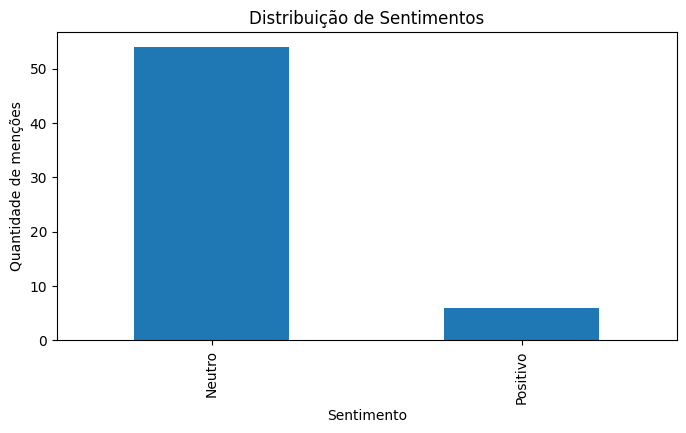

In [8]:
# Plotar um gráfico de barras da distribuição de sentimentos
contagem_sentimento.plot(kind="bar", figsize=(8, 4))

# Definir título e rótulos dos eixos
plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de menções")

# Exibir o gráfico
plt.show()


## 6) Tendências por tema (engajamento total)

Aqui identificamos quais temas somaram mais engajamento no período.

In [9]:
# Agrupar por tema e somar o engajamento total
engajamento_por_tema = df.groupby("tema")["engajamento"].sum().sort_values(ascending=False)

# Exibir a tabela de engajamento por tema
engajamento_por_tema


,engajamento
tema,
IA,9567
Tech,5540
Carreira,5339
Bem-estar,5270
Produtividade,5203
Sustentabilidade,4695
Moda,3092
Finanças,3036


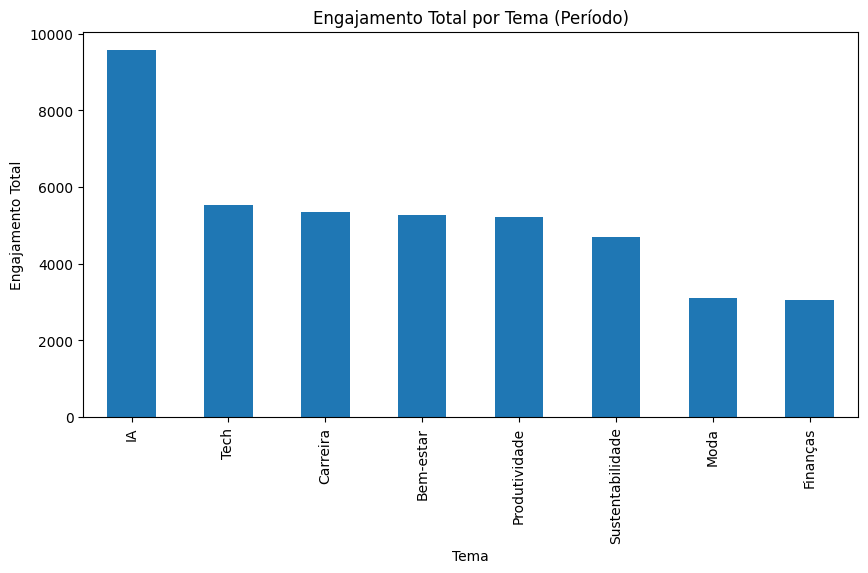

In [10]:
# Plotar o engajamento total por tema
engajamento_por_tema.plot(kind="bar", figsize=(10, 5))

# Configurar título e rótulos
plt.title("Engajamento Total por Tema (Período)")
plt.xlabel("Tema")
plt.ylabel("Engajamento Total")

# Mostrar o gráfico
plt.show()


## 7) Evolução das tendências ao longo do tempo.

Agora vemos como o engajamento de cada tema se comportou por data.

In [11]:
# Agrupar por data e tema, somando engajamento (para construir série temporal).
serie_tempo = df.groupby(["data", "tema"])["engajamento"].sum().reset_index()

# Exibir as primeiras linhas da série temporal.
serie_tempo.head()


,data,tema,engajamento
0,2025-12-23,Sustentabilidade,737
1,2025-12-23,Tech,1130
2,2025-12-25,Bem-estar,740
3,2025-12-25,Moda,570
4,2025-12-25,Produtividade,977


In [12]:
# Pivotar a tabela: datas viram linhas, temas viram colunas, valores viram engajamento.
pivot_tempo = serie_tempo.pivot(index="data", columns="tema", values="engajamento")

# Substituir valores ausentes (dias sem posts daquele tema) por 0.
pivot_tempo = pivot_tempo.fillna(0)

# Exibir um pedaço da tabela pivotada.
pivot_tempo.head()


tema,Bem-estar,Carreira,Finanças,IA,Moda,Produtividade,Sustentabilidade,Tech
data,,,,,,,,
2025-12-23,0.0,0.0,0.0,0.0,0.0,0.0,737.0,1130.0
2025-12-25,740.0,0.0,0.0,0.0,570.0,977.0,599.0,0.0
2025-12-26,0.0,462.0,0.0,0.0,0.0,0.0,788.0,0.0
2025-12-27,391.0,0.0,0.0,0.0,0.0,0.0,405.0,0.0
2025-12-28,0.0,639.0,344.0,0.0,0.0,0.0,0.0,0.0


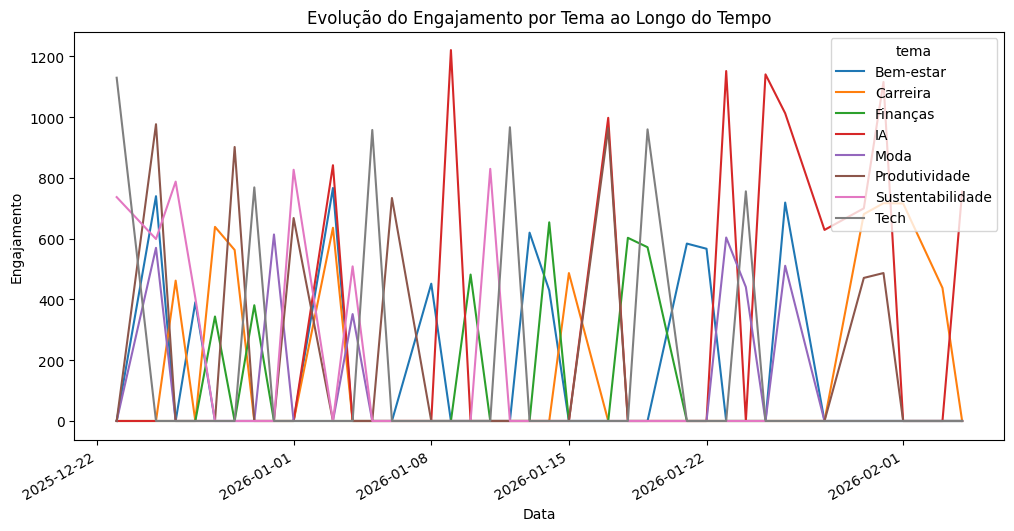

In [13]:
# Plotar a evolução de engajamento por tema ao longo do tempo.
pivot_tempo.plot(figsize=(12, 6))

# Configurar título e eixos.
plt.title("Evolução do Engajamento por Tema ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Engajamento")

# Mostrar o gráfico.
plt.show()


## 8) Identificar temas em crescimento (últimos 14 dias vs 14 dias anteriores)

Uma forma simples de detectar tendência é comparar **períodos recentes**.

Aqui vamos:
- Somar engajamento por tema nos **últimos 14 dias**.
- Somar engajamento por tema nos **14 dias anteriores**.
- Calcular variação (%).

> Em projetos reais, você pode usar janelas móveis, modelos de séries temporais e detecção de picos.

In [14]:
# Definir a data mais recente da base (para ancorar a janela de análise).
data_max = df["data"].max()

# Definir o início da janela recente (últimos 14 dias).
inicio_recente = data_max - pd.Timedelta(days=14)

# Definir o início da janela anterior (14 dias antes da recente).
inicio_anterior = data_max - pd.Timedelta(days=28)

# Filtrar o período recente (últimos 14 dias).
df_recente = df[df["data"] >= inicio_recente]

# Filtrar o período anterior (14 a 28 dias atrás).
df_anterior = df[(df["data"] >= inicio_anterior) & (df["data"] < inicio_recente)]

# Somar engajamento por tema em cada período.
eng_recente = df_recente.groupby("tema")["engajamento"].sum()
eng_anterior = df_anterior.groupby("tema")["engajamento"].sum()

# Juntar as duas séries em um DataFrame para comparar lado a lado.
comparativo = pd.DataFrame({
    "engajamento_ultimos_14d": eng_recente,
    "engajamento_14d_anteriores": eng_anterior
}).fillna(0)

# Calcular crescimento percentual (evitando divisão por zero).
comparativo["crescimento_%"] = comparativo.apply(
    lambda row: ((row["engajamento_ultimos_14d"] - row["engajamento_14d_anteriores"]) / row["engajamento_14d_anteriores"] * 100)
    if row["engajamento_14d_anteriores"] > 0 else 100.0,  # se não havia engajamento antes, consideramos 100% (surgiu agora)
    axis=1
)

# Ordenar pelos temas com maior crescimento.
comparativo = comparativo.sort_values("crescimento_%", ascending=False)

# Exibir o comparativo.
comparativo


,engajamento_ultimos_14d,engajamento_14d_anteriores,crescimento_%
tema,,,
Carreira,2552.0,487.0,424.024641
IA,6506.0,2219.0,193.195133
Moda,1556.0,0.0,100.000000
Bem-estar,1870.0,1502.0,24.500666
Produtividade,958.0,964.0,-0.622407
Tech,756.0,1927.0,-60.768033
Finanças,0.0,2311.0,-100.000000
Sustentabilidade,0.0,830.0,-100.000000


## 9) Recomendações práticas para o time de conteúdo (automáticas).

Agora vamos gerar recomendações **a partir de regras simples**:

- **Tema em alta**: top 3 em engajamento total.
- **Tema em crescimento**: top 3 em crescimento (%).
- **Risco de reputação**: tema com alto engajamento e sentimento negativo.

> Em ambiente real, essas regras podem virar alertas e rotinas semanais.

In [15]:
# Definir os 3 temas com maior engajamento no período total.
top_temas_engajamento = engajamento_por_tema.head(3).index.tolist()

# Definir os 3 temas com maior crescimento recente.
top_temas_crescimento = comparativo.head(3).index.tolist()

# Calcular percentual de sentimento negativo por tema.
sent_neg = (df[df["sentimento"] == "Negativo"]
            .groupby("tema")["sentimento"]
            .count())

# Calcular total de menções por tema (para virar porcentagem).
total_mencoes = df.groupby("tema")["sentimento"].count()

# Construir um DataFrame com o percentual negativo.
pct_negativo = (sent_neg / total_mencoes).fillna(0) * 100

# Juntar com engajamento total para identificar risco (alto engajamento + alto negativo).
risco = pd.DataFrame({
    "engajamento_total": engajamento_por_tema,
    "pct_negativo": pct_negativo
}).fillna(0)

# Criar uma métrica simples de risco (peso maior para engajamento).
risco["score_risco"] = risco["engajamento_total"] * (1 + risco["pct_negativo"] / 100)

# Ordenar por risco.
risco = risco.sort_values("score_risco", ascending=False)

# Definir o tema mais crítico (se existir).
tema_risco = risco.head(1).index.tolist()[0]

# Exibir tabelas de apoio.
top_temas_engajamento, top_temas_crescimento, risco.head(5)


(['IA', 'Tech', 'Carreira'],
 ['Carreira', 'IA', 'Moda'],
                engajamento_total  pct_negativo  score_risco
 tema                                                       
 IA                          9567           0.0       9567.0
 Tech                        5540           0.0       5540.0
 Carreira                    5339           0.0       5339.0
 Bem-estar                   5270           0.0       5270.0
 Produtividade               5203           0.0       5203.0)

In [16]:
# Gerar recomendações em formato de texto (para copiar em relatório/Slack/Email).
recomendacoes = []

# Recomendação 1: temas em alta no período.
recomendacoes.append("✅ Temas com maior engajamento no período: " + ", ".join(top_temas_engajamento) + ".")
recomendacoes.append("➡️ Ação sugerida: planejar conteúdos pilares + variações (carrossel, reels, stories) nesses temas.")

# Recomendação 2: temas com maior crescimento recente.
recomendacoes.append("📈 Temas com maior crescimento nos últimos 14 dias: " + ", ".join(top_temas_crescimento) + ".")
recomendacoes.append("➡️ Ação sugerida: produzir conteúdo rápido (oportunidade) e testar formatos curtos para surfar a tendência.")

# Recomendação 3: risco reputacional (alto engajamento + % negativo).
recomendacoes.append("⚠️ Tema com maior score de risco (alto engajamento + negativo): " + tema_risco + ".")
recomendacoes.append("➡️ Ação sugerida: revisar abordagem, checar comentários, preparar respostas e alinhar posicionamento com a marca.")

# Exibir recomendações.
for r in recomendacoes:
    print(r)


✅ Temas com maior engajamento no período: IA, Tech, Carreira.
➡️ Ação sugerida: planejar conteúdos pilares + variações (carrossel, reels, stories) nesses temas.
📈 Temas com maior crescimento nos últimos 14 dias: Carreira, IA, Moda.
➡️ Ação sugerida: produzir conteúdo rápido (oportunidade) e testar formatos curtos para surfar a tendência.
⚠️ Tema com maior score de risco (alto engajamento + negativo): IA.
➡️ Ação sugerida: revisar abordagem, checar comentários, preparar respostas e alinhar posicionamento com a marca.


## 10) Conclusão:

Neste projeton foi apresentado como:

- Estruturar um pipeline de dados (criação/ingestão → limpeza → análise → visualização)
- Monitorar tendências com métricas e janela temporal
- Criar recomendações acionáveis para tomada de decisão

**Próximo nível para aumentar senioridade e conhecimento:**
- Trocar o TextBlob por um modelo de sentimento em PT-BR.
- Criar alertas (ex.: quando crescimento > X%).
- Conectar com APIs (ex.: Google Trends, X/Twitter, YouTube).